# Lab 5 - Ensemble methods - boosting

## About the data

### Context
News article datasets, originating from BBC News, provided for use as benchmarks for machine learning research. The original data is processed to form a single csv file for ease of use, the news title and the related text file name is preserved along with the news content and its category. This dataset is made available for non-commercial and research purposes only.

All rights, including copyright, in the content of the original articles are owned by the BBC.

### Content
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005. 
Class Labels: 5 (business, entertainment, politics, sport, tech)

### Acknowledgements
It might be interesting to read the associated [research article](http://mlg.ucd.ie/files/publications/greene06icml.pdf).

#### Associated Official Research Papers

D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

using 'kaggle.json' file from the first lab, load the competition's data:

(remember to upload it to your environment)

You suppose to have 3 files:

```
newsgroup20bbcnews.zip
```


In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download balatmak/newsgroup20bbcnews
! unzip newsgroup20bbcnews.zip

 40% 6.00M/15.1M [00:00<00:00, 60.9MB/s]
100% 15.1M/15.1M [00:00<00:00, 105MB/s] 
Archive:  newsgroup20bbcnews.zip
  inflating: bbc-text.csv            
  inflating: news_group20.csv        


In [2]:
import pandas as pd

data = pd.read_csv('/content/bbc-text.csv')
data.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


## Task 1:
Load 'bbc-text.csv' file. As you can see, this time we are working with textual data. 

To use it for calssification models we should tokenize it and create features out of the text.

Use sklearn.feature_extraction.text.TfidfVectorizer with stop_words='english', max_features=1000 and analyzer='word'
to convert the text into features.

Use sklearn.preprocessing.LabelEncoder to encode the category

Split the data into train and test with 25% test

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, analyzer='word')
encoder = LabelEncoder()

X = vectorizer.fit_transform(data['text'])
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
y = encoder.fit_transform(data['category'])

print(X.shape, y.shape)
X.head()

(2225, 1000) (2225,)


,000,10,100,11,12,13,14,15,16,17,...,world,worth,written,wrong,year,years,york,young,yukos,zealand
0,0.029706,0.0,0.042394,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.051819,0.000000,0.0,0.0,0.0
1,0.059799,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.099563,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.114984,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.116343,0.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Task 2:
Create and train each of the following:

*   sklearn.ensemble.AdaBoostClassifier with DecisionTreeClassifier
*   XGBoost.XGBClassifier
*   logitboost.LogitBoost

with n_estimators=50, max_depth=5 
and any other parameters you see fit.

In [10]:
!pip install logitboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                              n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   random_state=42)

In [23]:
import xgboost as xgb


xboost = xgb.XGBClassifier(max_depth=5, n_estimators=50, random_state=42)
xboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [20]:
from logitboost import LogitBoost


lboost = LogitBoost(n_estimators=50, random_state=42)
lboost.fit(X_train, y_train)

LogitBoost(random_state=42)

## Task 3:
Test and evaluate each of the models using accuracy score

In [ ]:
y_pred_a = adaboost.predict(X_test)
y_pred_x = xboost.predict(X_test)
y_pred_l = lboost.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score


acc_a = accuracy_score(y_test, y_pred_a)
acc_x = accuracy_score(y_test, y_pred_x)
acc_l = accuracy_score(y_test, y_pred_l)

print(f'AdaBoost: {acc_a}\n\nXGBoost: {acc_x}\n\nLogitBoost: {acc_l}')

AdaBoost: 0.9066427289048474

XGBoost: 0.9353680430879713

LogitBoost: 0.9281867145421903


## Task 4:

LogitBoost reveals good performances, run the following code to create a plot of the model's accuracy for each boosting stage.

What can you say about the model performances? What would you change?

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature nam

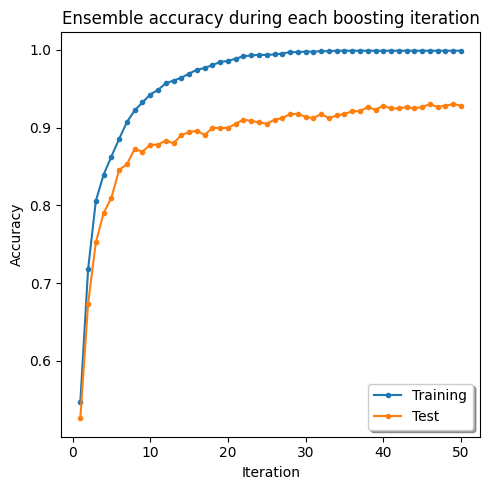

In [32]:
import numpy as np
import matplotlib.pyplot as plt


iterations = np.arange(1, lboost.n_estimators + 1)
staged_accuracy_train = list(lboost.staged_score(X_train, y_train))
staged_accuracy_test = list(lboost.staged_score(X_test, y_test))

plt.figure(figsize=(5, 5))
plt.plot(iterations, staged_accuracy_train, label='Training', marker='.')
plt.plot(iterations, staged_accuracy_test, label='Test', marker='.')

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Ensemble accuracy during each boosting iteration')
plt.legend(loc='best', shadow=True, frameon=True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature nam

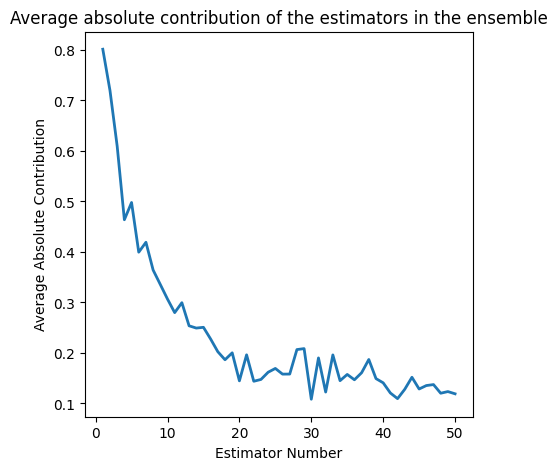

In [33]:
plt.figure(figsize=(5, 5))
plt.plot(iterations, lboost.contributions(X_train), lw=2)
plt.xlabel('Estimator Number')
plt.ylabel('Average Absolute Contribution')
plt.title('Average absolute contribution of the estimators in the ensemble')
plt.show()
plt.close()

Answer Here - 
**After less than half of the iterations the model got overfit. In addition, the contribution of more than half of the base estimators is really insignificant.
The model would produce better results if the number of estimators would be about 25.**

## Task 5:
Convert the notebook into html:


1.   Download the notebook by clicking the File tab
2.   Upload it to this environment
3.   Run the command:

In [ ]:
%%shell
jupyter nbconvert --to html Lab5.ipynb